(8)=
# Chapter 8: Mathematics

In [2]:
%config InlineBackend.figure_format = 'svg'

We have already been doing math throughout this book as Python is fundamentally performing mathematical operations through arithmetic, calculus, algebra, and Boolean logic among others, but this chapter will dive deeper into symbolic mathematics, matrix operations, and integration. Some of this chapter will rely on SciPy and NumPy, but for the symbolic mathematics, we will use the popular [SymPy  library](http://www.sympy.org/en/index.html).

SymPy is the main library in the SciPy ecosystem for performing symbolic mathematics, and it is suitable for a wide audience from high school school students to scientific researchers. It is something like a free, open source Mathematica substitute that is built on Python and is arguably more accessible in terms of cost and ease of acquisition. All of the following SymPy code relies on the following import which makes all of the SymPy modules available.

In [3]:
import sympy

(8.1)=
## 8.1 Symbolic Mathematics

SymPy differentiates itself from the rest of Python and SciPy stack in that it returns exact or symbolic results whereas Python, SciPy, and NumPy will generate numerical answers which may not be exact. That is to say, not only does SymPy perform symbolic mathematical operations, but even if the result of an operation has a numerical answer, SymPy will return the value in exact form. For example, if we take the square root of 2 using the `math` module, we get a numerical value.

In [4]:
import math
math.sqrt(2)

1.4142135623730951

The value returned is a rounded approximation of the true answer. In contrast, if the same operation is performed using SymPy, we get a different result.

```{index} SymPy
```

In [5]:
sympy.sqrt(2)

sqrt(2)

Because the square root of two is an irrational number, it cannot be represented exactly by a decimal, so SymPy leaves it in the exact form of `sqrt(2)`. If we absolutely need a numerical value, SymPy can be instructed to evaluate an imprecise, numerical value using the `evalf()` method.

In [6]:
sympy.sqrt(2).evalf()

1.41421356237310

One of the advantages of `evalf()` is that it also accepts a significant figures argument.

In [7]:
sympy.sqrt(2).evalf(30)

1.41421356237309504880168872421

In [8]:
sympy.pi.evalf(40)

3.141592653589793238462643383279502884197

(8.1.1)=
### 8.1.1 Symbols

```{index} algebra
```

Before SymPy will accept a variable as a symbol, the variable must first be defined as a SymPy symbol using the `symbols()` function. It takes one or more symbols at a time and attaches them to variables.

In [9]:
x, c, m = sympy.symbols('x c m')

In [10]:
x

x

There is no value attached to `x` as it is a symbol, so now it can be used to generate symbolic mathematical expressions.

In [11]:
E = m*c**2

In [12]:
E

c**2*m

In [13]:
E**2

c**4*m**2

(8.1.2)=
### 8.1.2 Pretty Printing

Depending upon settings and version of SymPy, the output may look like Python equations which are not always the easiest to read. If so, you can turn on *pretty printing*, shown below, which will instruct SymPy to render the expressions in more traditional mathematical representations that you might see in a math textbook.

~~~python
from sympy import init_printing
sympy.init_printing()
~~~

(8.1.3)=
### 8.1.3 SymPy Mathematical Functions

Similar to the `math` Python module, SymPy contains an assortment of standard mathematical operators such as square root and trigonometric functions. A table of common functions is below. Some of the functions start with a capital letter such as `Abs()`. This is important so that they do not collide with native Python functions if SymPy is imported into the global namespace.

**Table 1** Common SymPy Functions

|      |       |        |        |        |
| :--: | :---: | :---:  | :---:  | :----: |   
|`Abs()`| `sin()` | `cos()` | `tan()`| `cot()` |
|`sec()` | `csc()` | `asin()` | `acos()` | `atan()` |
|`ceiling()` | `floor()` | `Min()` | `Max()` | `sqrt()` |

It is important to note that any mathematical function operating on a symbol needs to be from the SymPy library. For example, using a `math.cos()` function from the `math` Python modeule will result in an error.

(8.2)=
## 8.2 Algebra in SymPy

SymPy is quite capable at algebraic operations and is knowledgeable of common identities such as $sin(x)^2 + cos(x)^2 = 1$, but before we proceed with doing algebra in SymPy, we need to cover some basic algebraic methods. These are provided in Table 2 which includes polynomial expansion and factoring, expression simplification, and solving equations. The subsequent sections demonstrate each of these.

**Table 2** Common Algebraic Methods

| Method | Description |
|:------:|:----------  |
|`sympy.expand()` | Expand polynomials |
|`sympy.factor()` | Factors polynomials |
|`sympy.simplify()` | Simplifies the expression |
|`sympy.solve()` | Equates the expression to zero and solves for the requested variable |

(8.2.1)=    
### 8.2.1 Polynomial Expansion and Factoring

```{index} factoring polynomials
```

When dealing with polynomials, expansion and factoring are common operations that can be tedious and time-consuming by hand. SymPy makes these quick and easy. For example, we can expand the expression $(x - 1)(3x + 2)$ as demonstrated below.

In [14]:
expr = (x - 1)*(3*x + 2)

In [15]:
sympy.expand(expr)

3*x**2 - x - 2

The process can be reversed by factoring the polynomial.

In [16]:
sympy.factor(3*x**2 - x - 2)

(x - 1)*(3*x + 2)

(8.2.2)=
### 8.2.2 Simplification

SymPy may not always return a mathematical expression in the simplest form. Below is an expression with a simpler form, and if we feed this into SymPy, it is not automatically simplified.

In [17]:
3*x**2 - 4*x - 15 / (x - 3)

3*x**2 - 4*x - 15/(x - 3)

However, if we instruct SymPy to simplify the expression using the `simplify()` method, it will make a best attempt at finding a simpler form.

In [18]:
sympy.simplify((3*x**2 - 4*x - 15) / (x - 3))

3*x + 5

(8.2.3)=
### 8.2.3 Solving Equations

```{index} single: root finding; with SymPy
```

SymPy can also solve equations for an unknown variable using the `solve()` function. The function requires a single expression that is equal to zero. For example, the following solves for $x$ in $x^2 + 1.4x – 5.76 = 0$.

In [19]:
sympy.solve(x**2 + 1.4*x - 5.76)

[-3.20000000000000, 1.80000000000000]

(8.2.4)=
### 8.2.4 Equilibrium ICE Table

```{index} single: equilibrium; ICE table
```

A common chemical application of the above algebraic operations is solving equilibrium problems using the ICE (Initial, Change, and Equilibrium) method. As a penultimate step, the mathematical expressions are inserted into the equilibrium expression and often result in a polynomial equation. Below is an example problem with completed ICE table and equilibrium expression.


|     | 2 NH3 | $\rightleftharpoons$ | 3 H2 (g) | + | N2 (g) | 
|:--: | :--:  |:-:|:-------: |:--:|:-----|
|Initial | 0.60 M |  | 0.60 M |  | 0.80 M |
| Change, $\Delta$| -2x |  |  +3x   |  |  +x    |
|Equilibrium | 0.60 - 2x | | 0.60 + 3x |  | 0.80 + x |



$$ K_c = 3.44 = \frac{[N_2][H_2]^3}{[NH_3]^2} = \frac{(0.80 + x)(0.60 + 3x)^3}{(0.60 - 2x)^2}  $$

To expand the right portion of the equation, we can use the `expand()` method.

In [20]:
expr = (0.80 + x) * (0.60 + 3*x)**3 / (0.60 - 2*x)**2

In [21]:
sympy.expand(expr)

27*x**4/(4*x**2 - 2.4*x + 0.36) + 37.8*x**3/(4*x**2 - 2.4*x + 0.36) + 16.2*x**2/(4*x**2 - 2.4*x + 0.36) + 2.808*x/(4*x**2 - 2.4*x + 0.36) + 0.1728/(4*x**2 - 2.4*x + 0.36)

This is probably not what you were expecting or hoping for. The polynomial has been expanded for the numerator and denominator, but the result is still a fraction. We can instruct SymPy to simplify the results.

In [22]:
sympy.simplify(sympy.expand(expr))

(27*x**4 + 37.8*x**3 + 16.2*x**2 + 2.808*x + 0.1728)/(4*x**2 - 2.4*x + 0.36)

This is much better. Ultimately, we want to solve for $x$, but the `solve()` function requires an expression that equals zero. We can achieve this by subtracting 3.44.

In [23]:
sympy.solve(expr - 3.44)

[-1.52752978294276,
 0.0916567216237442,
 0.0179365306595075 - 0.530628104891225*I,
 0.0179365306595075 + 0.530628104891225*I]

The fourth-order polynomial returns four solutions, but only one will make physical sense for our application. The second value, 0.09166,  is the only non-imaginary value that does not generate negative concentrations, so this is the solution for $x$.

(8.3)=
## 8.3 Matrices

```{index} linear algebra
```

Matrices are an efficient method of working with larger amounts of data. When done by hand, as is the case in many classroom environments, it is likely slow and painful. The beauty and power of matrices is when they are used with computers because they simplify bulk calculations. SymPy, SciPy, and NumPy all support matrix operations. If you need to do symbolic math, SymPy should be your go-to, but for the numerical calculations that we will do here, we will use NumPy's `linalg` module.

SciPy and NumPy both offer a matrix object, but the SciPy official documentation discourages their use as they offer little advantage over a standard NumPy array. We will stick with NumPy arrays here, but below demonstrates creating a matrix object if you feel that you absolutely must use them. See the NumPy documentation page for further details on attributes and methods for this class of object as they will not be covered here.

In [24]:
import numpy as np
mat = np.matrix([[1, 8], [3, 2]])

In [25]:
mat

matrix([[1, 8],
        [3, 2]])

(8.3.1)=
### 8.3.1 Mathematical Operations with Arrays

Being that we are using NumPy arrays, the standard mathematical operations use the `+`, `‒`, `*`, `/`, and `**` operators as demonstrated in chapter 4. There are a few other operations and methods, however, that are important for matrices such as calculating the inverse, determinant, transpose, and dot product. For these operations, we have the following methods provided by NumPy's `linalg` module, Table 3, which are demonstrated in the following sections.

```{index} single: matrix; determinant
```

**Table 3** Common `np.linalg` Methods

| Method | Description |
|:----:  | :---------  |
|`np.linalg.dot()` | Calculates the dot product|
|`np.linalg.inv()` | Returns the inverse of an array|
|`np.linalg.det()` | Returns the determinant of an array|
|`np.linalg.solve()`| Solves a system of linear equations|


In addition, it is worth reiterating that there is a general NumPy array method `transpose()` that will transpose or rotate the array around the diagonal. There is a convenient `array.T` shortcut that is often used. See [section 4.2.3](4.2.3) for details.

(8.3.2)=
### 8.3.2 Solving Systems of Equations

```{index} single: linear equations; with SymPy
```

Solving systems of equations can be a tedious process by hand, but solving them using matrices can save time and effort. Let us say we want to solve the following system of equations for $x$, $y$, and $z$.

$$ 6x + 10y + −5z = 21 $$
$$ 2x + 7y + z = 13 $$
$$ −10x + −11y + 11z = −21 $$

These equations can be rewritten in matrix or array form as follows with the left matrix holding the coefficients.

$$ \left[ \begin{array}{ccc} 6 & 10 & -5 \\ 2 & 7 & 1 \\ -10 & -11 & 11 \end{array} \right]
\cdot
\left[ \begin{array}{c} x \\ y \\ z \end{array} \right]
=
\left[ \begin{array}{c} 21 \\ 13 \\ -21 \end{array} \right] $$

We will call the first array `M`, the second `X`, and the third `y`, so we get

$$ M \cdot X = y $$

We can solve for X by multiplying (*dot product*) both sides by the inverse of M (i.e., $M^{-1}$). Anything multiplied by its inverse is the identity, so $M^{-1} \cdot M$ equals the matrix version of 1.

$$ M^{-1} \cdot M \cdot X = M^{-1} \cdot y $$

$$ X = M^{-1} \cdot y $$

```{index} single: matrix; dot product
```
```{index} single: matrix; inverse
```

To get the inverse of a matrix or array, we can use the `np.linalg.inv()` function provided by NumPy's linear algebra module and use the `dot()` method to take the dot product.

In [26]:
M  = np.array([[6, 10, -5],
               [-2, 7, 1],
               [-10, -11, 11]])
y = np.array([21, 13, -21])

In [27]:
np.linalg.inv(M).dot(y)

array([1., 2., 1.])

This means that $x$ = 1, $y$ = 2, and $z$ = 1.

As a chemical example, we can use the above mathematics and Beer’s law to determine the concentration of three light absorbing analytes in a solution. The mathematical representation of the law is written below where $A$ is absorbance (unitless), $b$ is path length (cm), $C$ is concentration (M), and $\epsilon$ is the molar absorptivity (cm$^{-1}$M$^{-1}$). The latter value is analyte dependent. 

$$ A = \epsilon bC $$

For a path length of 1.0 cm, which is quite common, the equation simplifies down to:

$$ A = \epsilon C $$

When there are three analytes, $x$, $y$, and $z$, the absorption of light at a given wavelength equals the sum of the individual absorptions.

$$ A = \epsilon_x C_x +  \epsilon_y C_y +  \epsilon_z C_z $$

If we measure the absorbance of a three analyte solution at three different wavelengths ($\lambda$), we get the following three equations. 

$$ A_{\lambda 1} = \epsilon_{x \lambda 1} C_x +  \epsilon_{y \lambda 1} C_y +  \epsilon_{z \lambda 1} C_z $$
$$ A_{\lambda 2} = \epsilon_{x \lambda 2} C_x +  \epsilon_{y \lambda 2} C_y +  \epsilon_{z \lambda 2} C_z $$
$$ A_{\lambda 3} = \epsilon_{x \lambda 3} C_x +  \epsilon_{y \lambda 3} C_y +  \epsilon_{z \lambda 3} C_z $$

As long as we know the molar absorptivity of each analyte at each wavelength collected from pure samples, we have three unknowns and three equations, so we can calculate the concentration of each component. The above equations can be represented as matrices shown below.

$$ \left[ \begin{array}{ccc} \epsilon_{x \lambda 1} & \epsilon_{y \lambda 1} & \epsilon_{z \lambda 1} \\ \epsilon_{x \lambda 2} & \epsilon_{y \lambda 2} & \epsilon_{z \lambda 2} \\ \epsilon_{x \lambda 3} & \epsilon_{y \lambda 3} & \epsilon_{z \lambda 3} \end{array} \right]
\cdot
\left[ \begin{array}{c} C_x \\ C_y \\ C_z \end{array} \right]
=
\left[ \begin{array}{c} A_{\lambda 1} \\ A_{\lambda 2} \\ A_{\lambda 3} \end{array} \right] $$

If the absorbances at the three wavelengths are 0.6469, 0.2823, and 0.2221, respectively, and we know the molar absorptivities, we get the following matrices.

$$ \left[ \begin{array}{ccc} 7.8 & 1.1 & 2.0 \\ 2.6 & 3.2 & 0.89 \\ 1.8 & 1.0 & 8.9 \end{array} \right]
\cdot
\left[ \begin{array}{c} C_x \\ C_y \\ C_z \end{array} \right]
=
\left[ \begin{array}{c} 0.6469 \\ 0.2823 \\ 0.2221 \end{array} \right] $$

We simply solve for the concentration matrix as was done earlier. Again, this is solvable using NumPy as shown below.

In [28]:
E  = np.array([[7.8, 1.1, 2.0],
               [2.6, 3.2, 0.89],
               [1.8, 1.0, 8.9]])
A = np.array([0.6469, 0.282274, 0.22214])
np.linalg.inv(E).dot(A)

array([0.078 , 0.023 , 0.0066])

The concentrations are $C_x$ = 0.078 M, $C_y$ = 0.023 M, and $C_z$ = 0.0066 M.

Alternatively, there is a `np.linalg.solve()` function that accomplishes the same calculation in a single function call. This function requires two pieces of information: the coefficient matrix and the dependant variable matrix. In our example, these are `E` and `A`, respectively.

In [29]:
np.linalg.solve(E, A)

array([0.078 , 0.023 , 0.0066])

```{note}
If performing either the above calculations on other data generates a `LinAlgError: Singular matrix` error, this means that the coefficient matrix does not have an inverse and cannot be solved by these methods.
```

(8.3.3)=
### 8.3.3 Least-Square Minimization by the Normal Equation

```{index} single: regression; normal equation
```

```{index} single: Beer's law; with matricies
```

Finding the line of best fit through data points can be accomplished by least-square minimization. What we are essentially looking for is an equation of the form $y = mx + b$ that is as close as possible to the data points, and the mean square error determines what qualifies as “close.” If we rewrite this problem in matrix or array form, it will look like the following for a series of four point ($x_n$, $y_n$) on a two-dimensional plane. The first array contains a columns of ones to multiply with b, so for the first row, we get $mx_0 + b = y_0$.

$$ \left[ \begin{array}{cc} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \\ x_3 & 1 \end{array} \right]
\cdot
\left[ \begin{array}{c} m \\ b \end{array} \right]
=
\left[ \begin{array}{c} y_0 \\ y_1 \\ y_2 \\ y_3 \end{array} \right] $$

We will call the leftmost matrix $X$, the center matrix $\theta$, and the rightmost matrix $y$.

$$ X \cdot \theta = y $$

Ultimately, we are looking for the values of $m$ and $b$, so we need to solve for matrix $\theta$. This can be accomplished through optimization algorithms, or in the case of linear regression, there is a direct solution known as the *normal equation* shown below where $X^T$ is the transpose of $X$.

$$ (X^T X)^{-1} X^T y = \theta $$

As an example, below is a table of synthetic data for copper cuprizone absorbances at various concentrations at 591 nm. We can use a linear fit to create a calibration curve from this data.

**Table 4** Beer-Lambert Law Data for Copper Cuprizone

|Concentration (10$^{-6}$ M) | Absorbance |
|:-------------------------: | :-------: |
|1.0 | 0.0154 |
| 3.0 | 0.0467 |
| 6.0 | 0.0930 |
| 15  | 0.2311 |
| 25  | 0.3925 |
| 35  | 0.5413 |


In [30]:
C = np.array([1.0e-06, 3.0e-06, 6.0e-06, 1.5e-05, 2.5e-05, 3.5e-05])
A = np.array([0.0154, 0.0467, 0.0930 , 0.2311, 0.3975, 0.5413])

In [31]:
y = A
X = np.vstack((C, np.ones(6))).T
X

array([[1.0e-06, 1.0e+00],
       [3.0e-06, 1.0e+00],
       [6.0e-06, 1.0e+00],
       [1.5e-05, 1.0e+00],
       [2.5e-05, 1.0e+00],
       [3.5e-05, 1.0e+00]])

For the sake of readability, the calculation using the normal equation has been split in half as shown below.

$$ u = (X^T X)^{-1} $$
$$ v = X^T y $$
$$ u\cdot v = \theta $$

In [32]:
u = np.linalg.inv(X.T.dot(X))
v = X.T.dot(y)
theta = u.dot(v)

In [33]:
theta

array([ 1.55886203e+04, -5.45355390e-06])

A plot of the linear regression and the data points is shown below, and the linear regression returned a molar absorptivity of 1.55 $\times$ 10$^4$ cm$^{-1}$M$^{-1}$.The regression also returned a $y$-intercept value of -5.45 $\times$ 10$^{-6}$, which is below the detection limits making it practically zero. This makes sense because the $y$-intercept should always be approximately zero if the background is subtracted. 

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Absorbance, au')

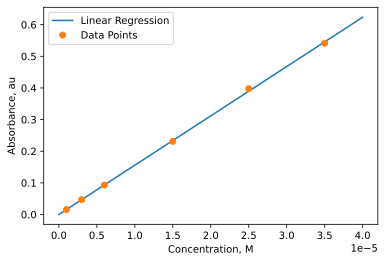

In [35]:
x = np.linspace(0, 4e-5, 10)
plt.plot(x, 1.55886e4 * x - 5.45355e-6, '-', label='Linear Regression')
plt.plot(C, A, 'o', label='Data Points')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Concentration, M')
plt.ylabel('Absorbance, au')

(8.3.4)=

### 8.3.4 Balancing Chemical Equations

```{index} balancing chemical equations
```

Matricies can also be used to balance chemical equations as shown below where $x_1$ through $x_4$ are the coefficients for the balanced chemical equation.

$$ x_1 C_3H_{8} + x_2 O_2 \rightarrow x_3 CO_2 + x_4 H_2O $$

We can then describe the number of carbon, hydrogen, and oxygen atoms in each compound using 3 $\times$ 1 matricies $\left[ \begin{array}{c} C \\ H \\ O \end{array} \right]$ as shown below.

$$ x_1 \left[ \begin{array}{c} 3 \\ 8 \\ 0 \end{array} \right] +
   x_2 \left[ \begin{array}{c} 0 \\ 0 \\ 2 \end{array} \right] \rightarrow
   x_3 \left[ \begin{array}{c} 1 \\ 0 \\ 2 \end{array} \right] +
   x_4 \left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right]
$$

Because the number of carbons, hydrogens, and oxygens should be the same on both sides of the balanced chemical equation, if we subtract the products from the reactants, we should get zero.

$$ x_1 \left[ \begin{array}{c} 3 \\ 8 \\ 0 \end{array} \right] +
   x_2 \left[ \begin{array}{c} 0 \\ 0 \\ 2 \end{array} \right] -
   x_3 \left[ \begin{array}{c} 1 \\ 0 \\ 2 \end{array} \right] -
   x_4 \left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right] =
   \left[ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right]
$$

One potentiall issue with this set of linear equations is that making all the $x$ variables zero is a valid solution, so to avoid this solution, we will set one of the $x$ variables to one. Remember that a balanced chemical equation is about the appropriate ratio between the reactants and products, so setting a single coefficient to one can still generate a balanced equation. The one issue is that the coefficients generated by the software may not be integers, but this can be fixed by multiplying the fractions to get whole numbers as a final step demonstrated further below. 

Here we have set $x_4$ = 1.

$$ x_1 \left[ \begin{array}{c} 3 \\ 8 \\ 0 \end{array} \right] +
   x_2 \left[ \begin{array}{c} 0 \\ 0 \\ 2 \end{array} \right] -
   x_3 \left[ \begin{array}{c} 1 \\ 0 \\ 2 \end{array} \right] -
   (1) \left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right] =
   \left[ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right]
$$

Now we move the last term to the right side.

$$ x_1 \left[ \begin{array}{c} 3 \\ 8 \\ 0 \end{array} \right] +
   x_2 \left[ \begin{array}{c} 0 \\ 0 \\ 2 \end{array} \right] -
   x_3 \left[ \begin{array}{c} 1 \\ 0 \\ 2 \end{array} \right] = 
   \left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right]
$$

These matricies can now be merged into one larger matrix. The left matrix below will be called `M` and the right matrix below is called `b`.

$$ \left[ \begin{array}{ccc} 3 & 0 & -1 \\ 8 & 0 & 0 \\ 0 & 2 & -2 \end{array} \right]
\cdot
\left[ \begin{array}{c} x_1 \\ x_2 \\ x_3 \end{array} \right]
=
\left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right] $$

We can then solve for the $x$ values to get our coefficients using the `np.linalg.solve()` function as demonstrated below. 

In [61]:
M = np.array([[3, 0, -1], [8, 0, 0], [0, 2, -2]])
b = np.array([0, 2, 1]).T

sol = np.linalg.solve(M, b)
sol

array([0.25, 1.25, 0.75])

This means that $x_1$=0.25, $x_2$=1.25, and $x_3$=0.75. We can append $x_4$ below and then multiply all the values by the same number to generate all integers.

In [62]:
sol = np.append(sol, 1)
sol * 4

array([1., 5., 3., 4.])

This means that the integer coefficients for the balanced chemical equation are $x_1$=1, $x_2$=5, $x_3$=3, and $x_4$=4.

$$ C_3H_{8} + 5 O_2 \rightarrow 3 CO_2 + 4 H_2O $$


(8.3.5)=
### 8.3.5 Eigenvalues and Eigenvectors

```{index} eigenvalues
```
```{index} eigenvectors
```
```{index} single: matrix; eigenvalues
```
```{index} single: matrix; eigenvectors
```

This section covers using `np.linalg` to calculate *eigenvalues* and *eigenvectors* which is useful in quantum mechanics among other applications. This topic will not be utilized later in this book, so feel free to skip over this section if you have no interest in this topic.

For a square matrix $A$, there can exist a scalar $\lambda$ and vector $V$ that satisfy the following equation.

$$ AV = \lambda V $$

The vector and scalar are known as the eigenvector and eigenvalue, respectively, and there may be more than one solution for any given matrix $A$.

The `np.linalg` module includes a function `np.linalg.eig()` that returns the eigenvalue(s) and eigenvector(s) for a given square matrix in this order

~~~python
np.linalg.eig(matrix)
~~~

As an example, we can determine the eigenvalues and eigenvector for the following matrix.

$$ A = \left[ \begin{array}{c} 3 & 1 \\ 4 & 3 \end{array} \right] $$

In [37]:
A = np.array([[3, 1], [4, 3]])
np.linalg.eig(A)

(array([5., 1.]),
 array([[ 0.4472136 , -0.4472136 ],
        [ 0.89442719,  0.89442719]]))

The first array contains the two eigenvalues while the second matrix contains the two eigenvector solutions.

Not every matrix has eigenvalues or eigenvectors. In the case of the following 90$\circ$ rotation matrix, the solution generated includes $j$ values which is Python's notation used in imaginary and complex numbers. 

$$ A = \left[ \begin{array}{c} 0 & -1 \\ 1 & 0 \end{array} \right] $$

In [38]:
A = np.array([[0, -1], [1, 0]])
np.linalg.eig(A)

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

(8.4)=
## 8.4 Calculus

```{index} calculus
```

SymPy and SciPy both contain functionality for performing calculus operations. We will start with SymPy for the symbolic math and switch over to SciPy for the strictly numerical work in [section 8.4.3](8.4.3). In this section, we will be working with the radial density functions ($\psi$) for hydrogen atomic orbitals. The squares of these functions ($\psi ^2$) provide the probability of finding an electron with respect to distance from the nucleus. While these equations are available in various textbooks, SymPy provides a `physics` module with a `R_nl()` function for generating these equations based on the principle (*n*) quantum number, angular (*l*) quantum number, and the atomic number (*Z*). For example, to generate the function for the 2p orbital of hydrogen, *n* = 2, *l* = 1, and *Z* = 1.

In [39]:
from sympy.physics.hydrogen import R_nl

In [40]:
r = sympy.symbols('r')
R_21 = R_nl(2, 1, r, Z=1)

In [41]:
R_21

sqrt(6)*r*exp(-r/2)/12

This provides the wavefunction equation with respect to the radius, *r*. We can also convert it to a Python function using the `sympy.lambdify()` method.

In [42]:
f = sympy.lambdify(r, R_21, modules='numpy')

This function is now callable by providing a value for *r*.

In [43]:
f(0.5)

0.07948602207520471

(8.4.1)=
### 8.4.1 Differentiation

```{index} differentiation
```

SymPy can take the derivative of mathematical expression using the `sympy.diff()` function.  This function requires a mathematical expression, the variable with respect the derivative is taken from, and the degree. The default behavior is to take the first derivative if a degree is not specified.

~~~python
sympy.diff(expr, r, deg)
~~~

As an example problem, the radius of maximum density can be found by taking the first derivative of the radial equation and solving for zero slope.

In [44]:
dR_21 = sympy.diff(R_21, r, 1)
dR_21

-sqrt(6)*r*exp(-r/2)/24 + sqrt(6)*exp(-r/2)/12

In [45]:
mx = float(sympy.solve(dR_21)[0])

The `solve()` function returns an array, so we need to index it to get the single value out. We can plot the radial density and the maximum density point to see if it worked.

Text(0, 0.5, 'Probability Density')

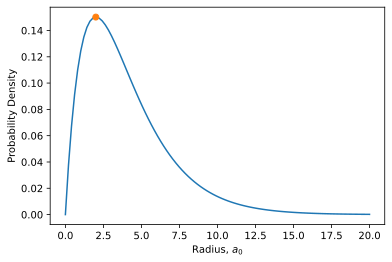

In [46]:
R = np.linspace(0,20,100)
plt.plot(R, f(R))
plt.plot(mx, f(mx), 'o')
plt.xlabel('Radius, $a_0$')
plt.ylabel('Probability Density')

The radius is in Bohrs ($a_0$) which is equal to approximately 0.53 angstroms.

(8.4.2)=
### 8.4.2 Integration of Functions

```{index} integration
```

SymPy can also integrate expressions using the `sympy.integrate()` function which takes the mathematical expression and the variable plus integration range in the form of a tuple. If the integration range is omitted, then SymPy will return a symbolic expression.

The normalized (i.e., totals to one) density function is the squared wave function times $r^2$ (i.e, $\psi ^2 r^2$). We can use this to determine the probability of finding an electron in a particular range of distances from the radius. Below, we integrate from the nucleus to the radius of maximum density.

In [47]:
sympy.integrate(R_21**2 * r**2, (r,0, mx)).evalf()

0.0526530173437111

There is a 5.27% probability finding an electron between the nucleus and the radius of maximum probability. This is probably may be a bit surprising, but examination of the radial density plot reveals that the radius of maximum probabily is quite close to the nucleus with a significant amount of density beyond the maximum radius. Let's see the probability of finding an electron between 0 and 10 Bohrs from the nucleus.

In [48]:
sympy.integrate(R_21**2 * r**2, (r,0,10)).evalf()

0.970747311923039

There is a 97.1% chance of finding the electron between 0 and 10 angstroms.

The SciPy library also includes functions in the `integrate` module for integrating mathematical functions. Information can be found on the SciPy documentation page listed at the end of this chapter under [Further Reading](further_reading08).

(8.4.3)=
### 8.4.3 Integrating Sampled Data

The above integration assumes a mathematical function is known. There are times when there is no known function to describe the data such as spectra. This is common in NMR spectroscopy and gas chromatography (GC) among many other applications where integrations of peak areas are used to quantify different components of a spectrum.

In the following example, we will use a section of a $^1$H NMR spectrum where we want to determine the ratio of the three triplet peaks via integration. NMR spectra are typically stored in binary files that require a special library to read, which is covered in chapter 11. For simplicity in this example, the data for a section of the NMR spectrum has been converted to a CSV file titled *Ar_NMR.csv*. 

In [49]:
nmr = np.genfromtxt('data/Ar_NMR.csv', delimiter=',')
nmr

array([[0.00000000e+00, 3.42490660e-03],
       [1.00000000e+00, 4.52560300e-03],
       [2.00000000e+00, 6.67372160e-03],
       [3.00000000e+00, 8.58410100e-03],
       [4.00000000e+00, 1.23892580e-02],
       [5.00000000e+00, 2.12517060e-02],
       [6.00000000e+00, 5.18062560e-02],
       [7.00000000e+00, 1.23403220e-01],
       [8.00000000e+00, 7.49717060e-02],
       [9.00000000e+00, 1.12987520e-01],
       [1.00000000e+01, 2.47482900e-01],
       [1.10000000e+01, 1.04401566e-01],
       [1.20000000e+01, 8.17907750e-02],
       [1.30000000e+01, 1.38453960e-01],
       [1.40000000e+01, 5.04080100e-02],
       [1.50000000e+01, 2.00982630e-02],
       [1.60000000e+01, 1.38752850e-02],
       [1.70000000e+01, 1.28241135e-02],
       [1.80000000e+01, 1.54948140e-02],
       [1.90000000e+01, 1.70803180e-02],
       [2.00000000e+01, 2.34651420e-02],
       [2.10000000e+01, 4.76330930e-02],
       [2.20000000e+01, 1.10299855e-01],
       [2.30000000e+01, 7.56612400e-02],
       [2.400000

The imported data are stored in an array where the first column contains the index values and the second column contains the amplitudes.

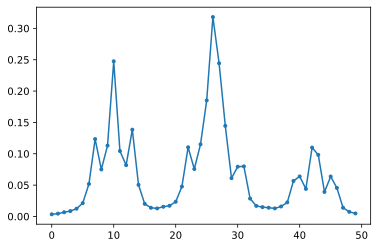

In [50]:
plt.plot(nmr[:,0],nmr[:,1], '.-')

Above is a plot of the peaks with respect to the index values (not ppm). To integrate under each of the triplet peaks, first we need the index values for the edges of each peak. Below is a list, `i`, that provides reasonable boundaries, and a plot is below with these edges marked in orange squares.

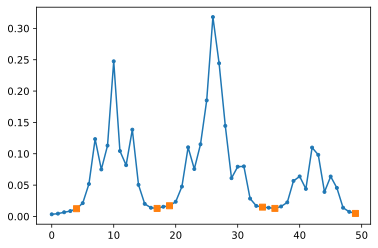

In [51]:
i = [(4, 17), (19, 34), (36, 49)]
plt.plot(nmr[:,1], '.-')
for pair in i:
    for point in pair:
        plt.plot(point, nmr[point,1], 'C1s')

Integrations under sampled data do not include the values between data points, so these regions are estimated based on assumptions. The `trapz()` function assumes that any data point between known points lies directly between the known data points (i.e., linear interpolation) as shown below by the blue lines.

In [52]:
from scipy.interpolate import interp1d

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


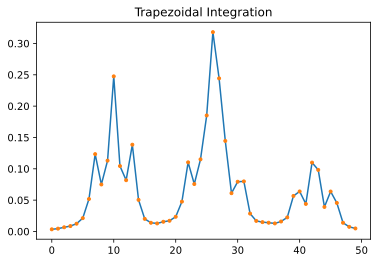

In [53]:
t = interp1d(nmr[:,0],nmr[:,1], kind='linear')
xnew = np.linspace(0,49, 50)

plt.plot(xnew, t(xnew), 'C0-')
plt.plot(nmr[:,0],nmr[:,1], 'C1.')
plt.title('Trapezoidal Integration')
plt.show()

Alternatively, the `simps()` function uses the *Simpson's rule* which estimates the data between known points using quadratic interpolation shown below.

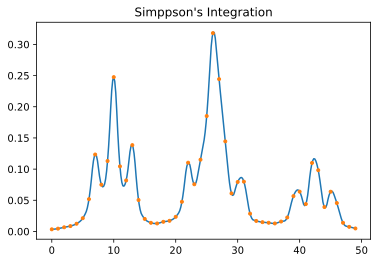

In [54]:
s = interp1d(nmr[:,0],nmr[:,1], kind='quadratic')
xnew = np.linspace(0,49, 300)

plt.plot(xnew, s(xnew), 'C0-')
plt.plot(nmr[:,0],nmr[:,1], 'C1.')
plt.title('Simppson\'s Integration')
plt.show()

Both functions take the `y` and `x` values in this order. Below, the trapezoidal method is employed.

In [55]:
from scipy.integrate import trapz

for peak in i:
    x = nmr[peak[0]:peak[1], 0]
    y = nmr[peak[0]:peak[1], 1]
    print(trapz(y, x))

1.0401881535
1.529880057
0.5834871775


The three peaks have areas of approximately 2:3:1 ratio. Using Simpson's rule here gives approximately the same result.

(8.4.4)=
### 8.4.4 Integrating Ordinary Differential Equations

*Ordinary differential equations (ODE)* mathematically describe the change of one or more dependent variables with respect to an independent variable. Common chemical applications include chemical kinetics, diffusion, electric current, among others. The SciPy `integrate` module provides an ODE integrator called `odeint()` which can integrate ordinary differential equations. This is useful for, among other things, integrating under kinetic differential equations to determine the concentration of reactants and products over the course of a chemical reaction. 

For example, the following is a first-order chemical reaction with starting material, A, and product, P.

$$ A \rightarrow P $$

```{index} isotopic decay kinetics
```

The decay of a radioactive isotope is an example of a first-order reaction because the rate of decay is proportional to the amount of A. First-order reaction rates are described by 

$$ Rate = \frac{d[A]}{dt} = -k[A] $$
 
where [A] is the concentration (M) of A, $k$ is the rate constant (1/s), and rate is the change in [A] versus time (M/s). The `odeint()` function below takes a differential equation in the form of a Python function, `func`, the initial values for A, `A0`, and a list or array of the times,`t`, to calculate the [A] . 

~~~python
scipy.integrate.odeint(func, A0, t)
~~~

The Python function can be defined by a `def` statement or a lambda expression. The former is used below.

In [56]:
def rate_1st(A, t):
    return -k * A

The function should take the dependent variable(s) as the first positional argument and the independent variable as the second positional argument. In this example, `A` is the dependent variable and time, `t`, is the independent variable. If there are multiple dependent variables, they need to be provided inside a composite object like a list or tuple which can be unpacked through indexing or tuple unpacking once inside the function. You may also notice that t is an unused argument in our Python function. It is included and required to signal to `odeint()` that the independent variable is `t`. The function is integrated below at times defined by `t`, and the initial concentration of A and rate constant are `A0` and `k`, respectively.

In [57]:
from scipy.integrate import odeint
t = np.arange(0,50,4)  # time(seconds)
A0 = 1  # starting concentration (molarity)
k = 0.1  # rate constant in 1/s
A_t = odeint(rate_1st, A0, t)
P_t = A0 - A_t    # concentration of product

The concentration of product (`P_t`) is calculated through the difference between the initial concentration of starting material and the current concentration. That is, we assume that whatever starting material was consumed has become product. The results of the simulation have been visualized below.

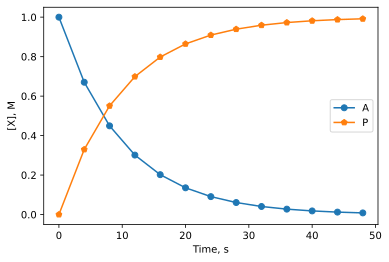

In [58]:
plt.plot(t, A_t, 'o-', label='A')
plt.plot(t, P_t, 'p-', label='P')
plt.xlabel('Time, s')
plt.ylabel('[X], M')
plt.legend()

This approach to kinetic simulations can be adapted to even more complex reactions which are demonstrated in [section 9.1.4](9.1.4).

(8.5)=
## 8.5 Mathematics in Python

Between SymPy, NumPy, SciPy, and Python's built-in functionality, there is often more than one way to carry out calculations in Python. For example, finding roots and derivatives of polynomials can be, along with the approaches demonstrated in this chapter, calculated by creating a NumPy `Polynomial` object and using NumPy's `roots()` and `deriv()` methods, respectively. How you carry out a calculation can often come down to matter of person preference, though there are differences in terms of speed and the output format. Find what works for you and do not necessarily worry if others are doing the same calculations through a different library or set of functions.

(further_reading08)=

## Further Reading
    
1. SymPy Website. [http://www.sympy.org/en/index.html](http://www.sympy.org/en/index.html) (free resource)

2. SciPy and NumPy Documentation Pages. [https://docs.scipy.org/doc/](http://www.sympy.org/en/index.html) (free resource)

## Exercises

Complete the following exercises in a Jupyter notebook using the SymPy and SciPy libraries. Any data file(s) refered to in the problems can be found in the **data** folder in the same directory as this chapter's Jupyter notebook.

1. Factor the following polynomial using SymPy: $x^2 + x – 6$

2.  Simplify the following mathematical expression using SymPy: $ z = 3x + x^2 + 2xy $

3. Expand the following expression using SymPy: $(x – 2)(x + 5)(x)$

4. A 53.2 g block of lead (Cp = 0.128 J/g·°C) at 128 °C is dropped into a 238.1 g water (Cp = 4.18 J/g·°C) at 25.0 °C. What is the final temperature of both the lead and water?
Hint: Assume this is an isolated system, so q$_{lead}$ + q$_{water}$ = 0. We also know that $q = mCp \Delta T$.

5. The following equation relates the $\Delta$G with respect to the equilibrium constant K. 

    $$ \Delta G = \Delta G^o - RT ln(K) $$

    If $\Delta G^o$ = -1.22 kJ/mol for a chemical reaction, what is the value for K for this reaction at 298 K? Use the `sympy.solve()` function to solve this problem. Remember that equilibrium is when $\Delta$G = 0 kJ/mol, and watch your energy units. (R = 8.314 J/mol·K)

6. A matrix or array of x,y coordinates can be rotated on a two-dimensional plane around the origion by multiplying by the following rotation matrix (M$_R$). The angle ($\theta$) is in radians, and the coordinates are rotated clockwise around the origin.

    $$ M_R = \left[ \begin{array}{cc} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{array} \right] $$

    Below is an example using three generic points on the x,y plane.

    $$ \left[ \begin{array}{cc} x_0 & y_0 \\ x_1 & y_1 \\ x_2 & y_2 \end{array} \right] 
    \cdot  
    \left[ \begin{array}{cc} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{array} \right]  
    =
    \left[ \begin{array}{cc} x'_0 & y'_0 \\ x'_1 & y'_1 \\ x'_2 & y'_2 \end{array} \right]
    $$
    
    a) Given the following coordinates for the four atoms in carbonate (CO$_3^{2-}$) measured in angstroms, rotate them       90$^o$ clockwise. Plot the initial and rotated points in different colors to show that it worked.
    
    $$ C: (2.00, 2.00) \quad O1: (2.00, 3.28) \quad O2: (0.27, 1.50) \quad O3: (3.73, 1.50) $$
    
    b) Package the above code into a function that takes an array of points and an angle and performs the above rotation.
    
7. Using the rotation matrix described in the above problem, write a function that rotates the carbonate anion around its own center of mass. The suggested steps to complete this task are listed below.

    a) Calculate the center of mass
    
    b)  Subtract the center of mass from all points to shift the cluster to the origin. 
    
    c) Rotate the cluster of points.
    
    d) Add the center of mass back the cluster the shift the points back.

8. The following is the equation for the work performed by a reversible, isothermal (i.e., constant T) expansion of a piston by a fixed quantity of gas.

    $$ w = \int_{v_i}^{v_f} -nRT \frac{1}{V}dV $$

    a) Using SymPy, integrate this expression symbolically for V$_i$ $\rightarrow$ V$_f$. Try having SymPy simplify the answer to see if there is a simpler form.

    b) Integrate the same express above for the expansion of 2.44 mol of He gas from 0.552 L to 1.32 L at 298 K. Feel free to use either SymPy or SciPy.

9. Using `odeint()`, simulate the concentration of starting material for the second-order reaction below and overlay it with the second-order integrated rate law to show that they agree.

    $$ 2A \rightarrow P $$
    
10. Below are the transformation matricies for an S$_4$ and C$_2$ operation used in group theory. Show that two S$_4$ operations equal one C$_2$ operation by multiplying two S$_4$ operations together. That is, show that S$_4$S$_4$ = C$_2$.

    $$ S_4 = \left[ \begin{array}{ccc} 0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & -1 \end{array} \right]
\quad
C_2 = \left[ \begin{array}{ccc} -1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 1 \end{array} \right]
$$